In [1]:
import pandas as pd
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn as sk
import statsmodels.api as sm
from sklearn import linear_model 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse, r2_score, mean_absolute_error
from scipy import stats
from scipy.stats import boxcox
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
pd.set_option('display.max_columns', None)

In [2]:
customer_df = pd.read_csv('C:/Users/ASUS/Desktop/Hector/week9/cleaning_categorical/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
customer_df.columns=customer_df.columns.str.lower().str.replace(' ', '_')
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [4]:
customer_df= customer_df.drop('customer', axis=1)

In [5]:
customer_df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
customer_df.dtypes

state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [7]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], errors='coerce')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1352\1248371158.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], errors='coerce')


In [8]:
numerical_df = customer_df.select_dtypes(include='number')
categorical_df = customer_df.select_dtypes(include='object')

In [9]:
categorical_df.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

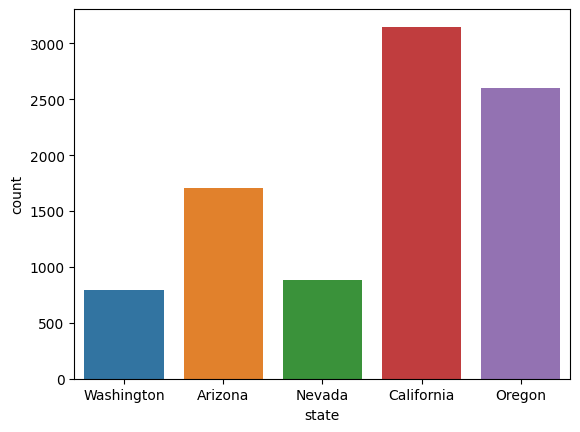

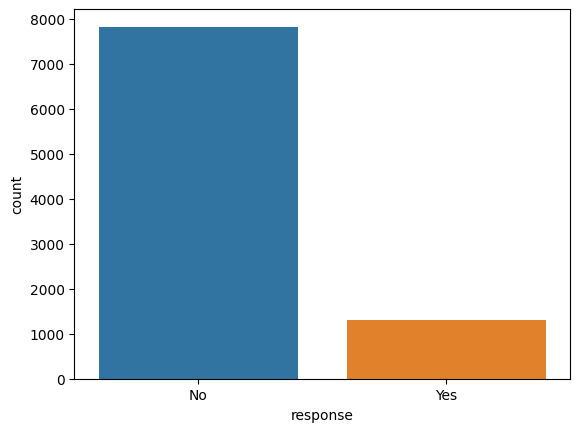

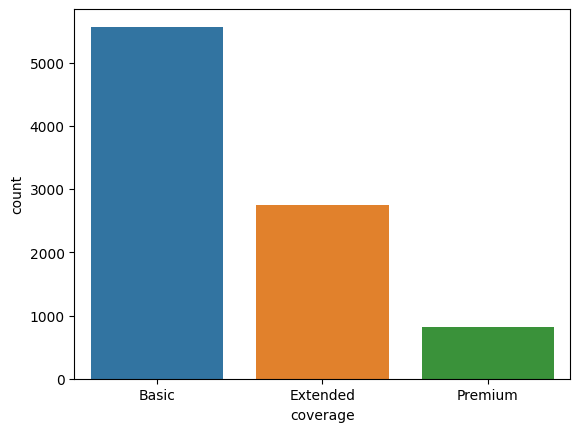

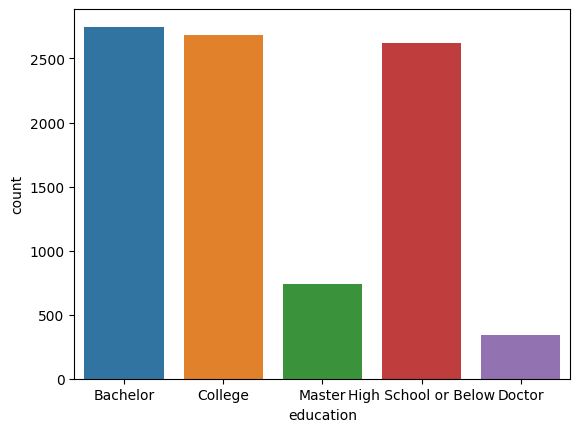

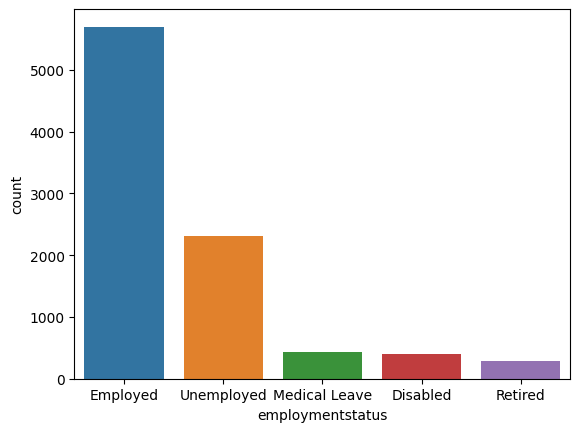

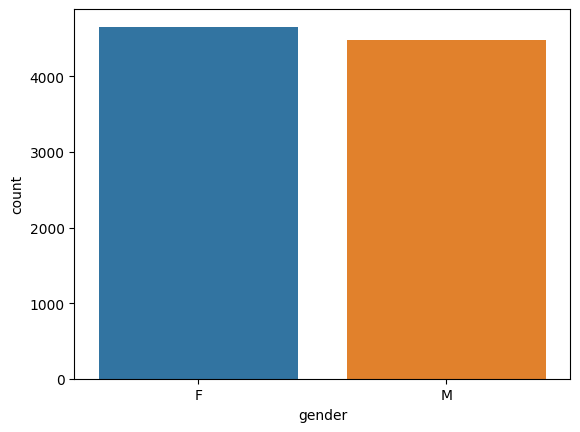

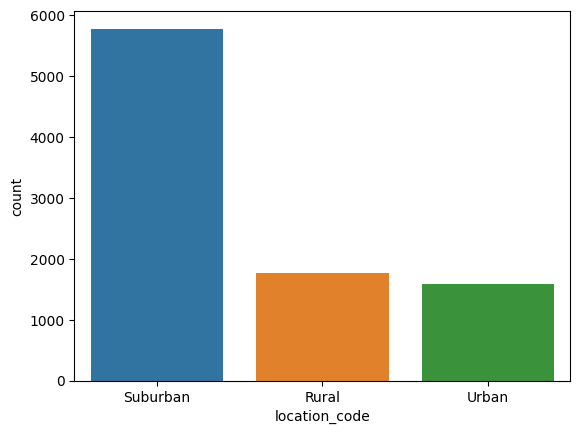

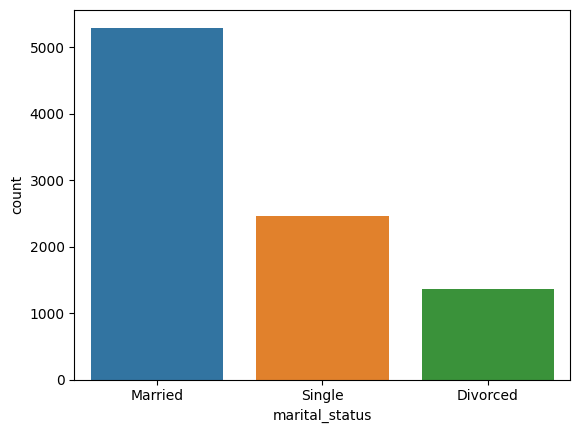

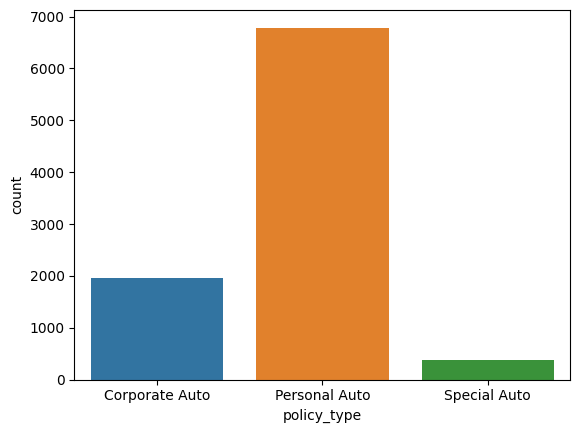

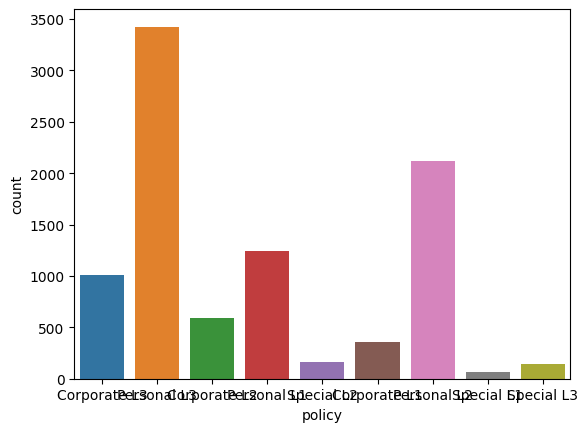

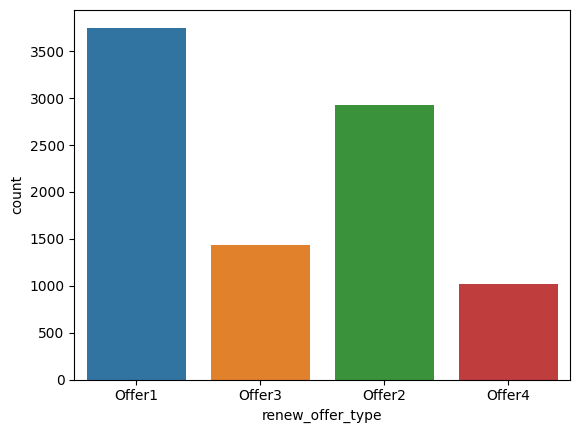

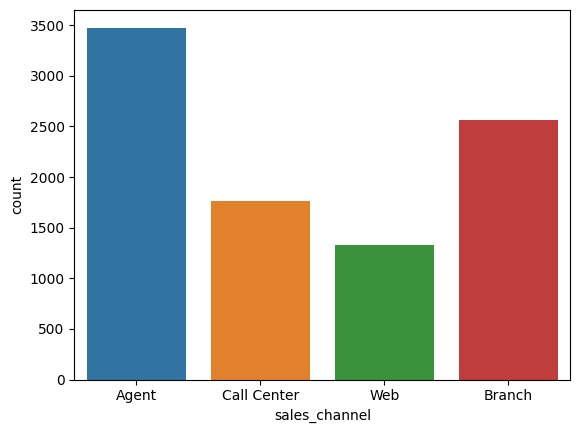

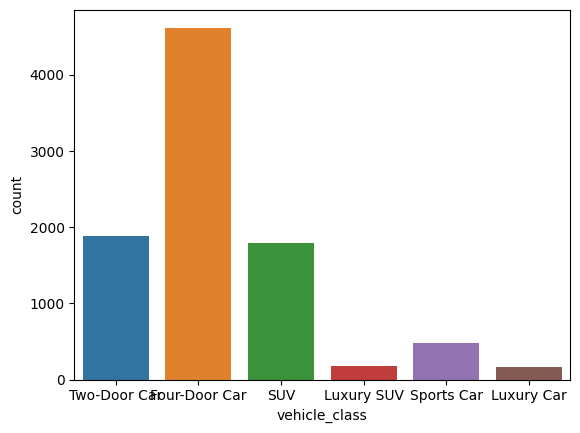

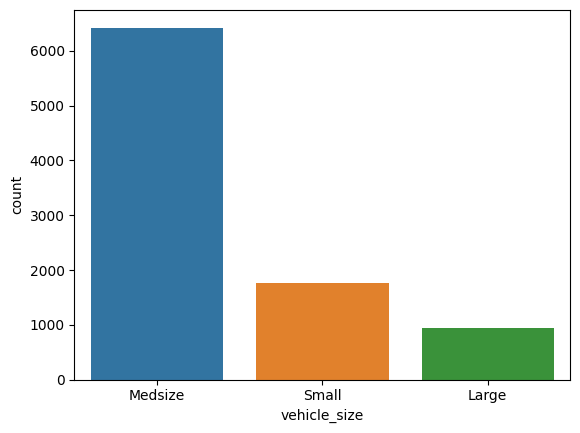

In [10]:
for i in categorical_df.columns:
    sns.countplot(data=categorical_df, x=i)
    plt.show()

In [11]:
categorical_df['vehicle_size'].value_counts()

vehicle_size
Medsize    6424
Small      1764
Large       946
Name: count, dtype: int64

In [13]:
for i in categorical_df:
    print(categorical_df[i].value_counts())

state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64
response
No     7826
Yes    1308
Name: count, dtype: int64
coverage
Basic       5568
Extended    2742
Premium      824
Name: count, dtype: int64
education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64
employmentstatus
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: count, dtype: int64
gender
F    4658
M    4476
Name: count, dtype: int64
location_code
Suburban    5779
Rural       1773
Urban       1582
Name: count, dtype: int64
marital_status
Married     5298
Single      2467
Divorced    1369
Name: count, dtype: int64
policy_type
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: count, dtype: int64
policy
Personal L3     3426
Personal L2     2122
Pe